# Exploratory Data Analysis (EDA)

This notebook generates plots for daily closing price of the stock index NIFTY 100 from 2017-01-02 to 2021-01-01 and minute-level closing price of NIFTY 100 on 2021-01-01 for full market hours as well as the first market hour. 

In [10]:
# import libraries and packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from PIL import Image

## 1. Load data
Out project utilizes a single dataset of minute-level transactions of the stock index NIFTY 100 from January 2, 2017 to January 1, 2021. The original dataset was obtrained from the Kaggle Competition site.

In [3]:
raw_data = pd.read_csv('../data/raw data/raw_NIFTY100.csv')
raw_data['time'] = pd.to_datetime(raw_data.timestamp)

In [4]:
raw_data.head()

,timestamp,open,high,low,close,volume,time
0,2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0,2017-01-02 09:15:00+05:30
1,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0,2017-01-02 09:16:00+05:30
2,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0,2017-01-02 09:17:00+05:30
3,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0,2017-01-02 09:18:00+05:30
4,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0,2017-01-02 09:19:00+05:30


In [15]:
raw_data['time'][0]

Timestamp('2017-01-02 09:15:00+0530', tz='pytz.FixedOffset(330)')

## 2. Exploration

The following is a sample dataset of all the transactions from January 1, 2021, the latest date included in the above dataset.

In [18]:
test_20210101 = raw_data.loc[raw_data.time.apply(lambda x:x.date()==pd.Timestamp('20210101'))].set_index('time')
test_20210101.head()

,timestamp,open,high,low,close,volume
time,,,,,,
2021-01-01 09:15:00+05:30,2021-01-01 09:15:00+05:30,14109.05,14132.05,14106.10,14126.60,0.0
2021-01-01 09:16:00+05:30,2021-01-01 09:16:00+05:30,14128.05,14131.40,14120.20,14120.75,0.0
2021-01-01 09:17:00+05:30,2021-01-01 09:17:00+05:30,14119.95,14124.50,14116.35,14124.10,0.0
2021-01-01 09:18:00+05:30,2021-01-01 09:18:00+05:30,14124.80,14130.50,14124.80,14128.25,0.0
2021-01-01 09:19:00+05:30,2021-01-01 09:19:00+05:30,14127.65,14129.90,14124.50,14127.55,0.0


As you can see in the below two cells, our dataset correponds to the market hours of India's National Stock Exchange, **9:15 AM - 3:29 PM** local time, and does not cover transactions record from neigher pre-market or after-market hours.

In [19]:
raw_data.time.min()

Timestamp('2017-01-02 09:15:00+0530', tz='pytz.FixedOffset(330)')

In [20]:
raw_data.time.max()

Timestamp('2021-01-01 15:29:00+0530', tz='pytz.FixedOffset(330)')

### 3-years Record
The figure below shows the daily closing price history from the entire dataset. Closing price is the standard way of daily stock price measurement. Here, one thing you can easily observe is that the trading has been especially volatile since the coronavirus pandemic in the early 2020. Although the stock price has been increasing throughout those past years, the extreme price drop at the beginning of the pandemic illustrates the uncertainty associated with stock trading and the exceptional difficulty to predict the price movements. 

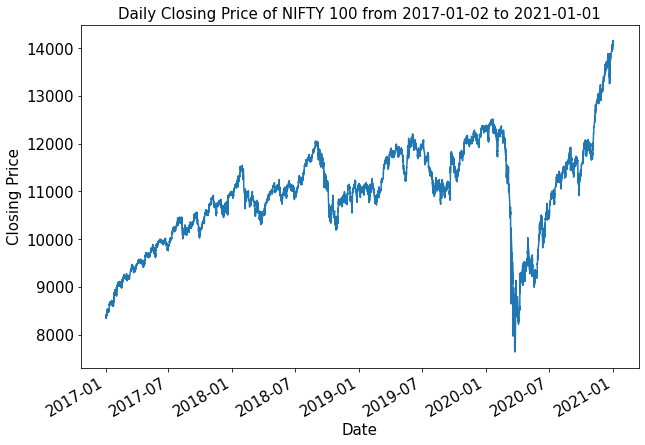

In [23]:
plt.figure(figsize=(10,7))
raw_data.close.plot(fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Daily Closing Price of NIFTY 100 from 2017-01-02 to 2021-01-01', fontsize = 15)
plt.show()

### Daily Record
The next figure shows the minute-level closing price record on January 1, 2021. Again, the first entry is at 9:15 AM and the last one is at 3:29 PM. On this day, the price started low and steadily increased in the morning hours. After the price dropped to the initial price around noon, it again started going up in the afternoon, before significantly dropping around 3 PM. The index price ended net-positive that day, but the but the total increase is only a little.

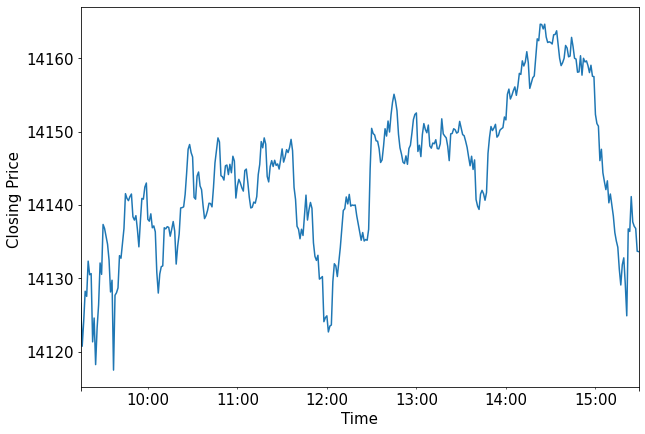

In [25]:
plt.figure(figsize=(10,7))
test_20210101.close.plot(fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Closing Price ',fontsize=15)
plt.show()

### First Market Hour
For our classification task with deep learning, out input data is images converted from time series data of first one hour of market transactions. Each of those images is generated from a time series record of the first one hour of market, 9:15 - 10:14 AM, each day. The below plot represents the first one hour record of the closing price on January 1, 2021. The classfication task is basically to predict the daily price movements from the above figure (*increased* in this case) just by looking at the figure below of the first one hour.

In [40]:
def first_hour(time):
    if time.hour == 9:
        if time.minute >=15:
            return True
    elif time.hour == 10:
        if time.minute < 15:
            return True
    else:
        return False

test_20210101_first = test_20210101.copy()
test_20210101_first['minute'] = pd.to_datetime(test_20210101_first.timestamp)
test_20210101_first['temp'] = test_20210101_first.minute.apply(first_hour)
test_20210101_first = test_20210101_first[test_20210101_first.temp==True]
test_20210101_first = test_20210101_first.drop(['timestamp','temp'],axis=1)
test_20210101_first.head()

,open,high,low,close,volume,minute
time,,,,,,
2021-01-01 09:15:00+05:30,14109.05,14132.05,14106.10,14126.60,0.0,2021-01-01 09:15:00+05:30
2021-01-01 09:16:00+05:30,14128.05,14131.40,14120.20,14120.75,0.0,2021-01-01 09:16:00+05:30
2021-01-01 09:17:00+05:30,14119.95,14124.50,14116.35,14124.10,0.0,2021-01-01 09:17:00+05:30
2021-01-01 09:18:00+05:30,14124.80,14130.50,14124.80,14128.25,0.0,2021-01-01 09:18:00+05:30
2021-01-01 09:19:00+05:30,14127.65,14129.90,14124.50,14127.55,0.0,2021-01-01 09:19:00+05:30


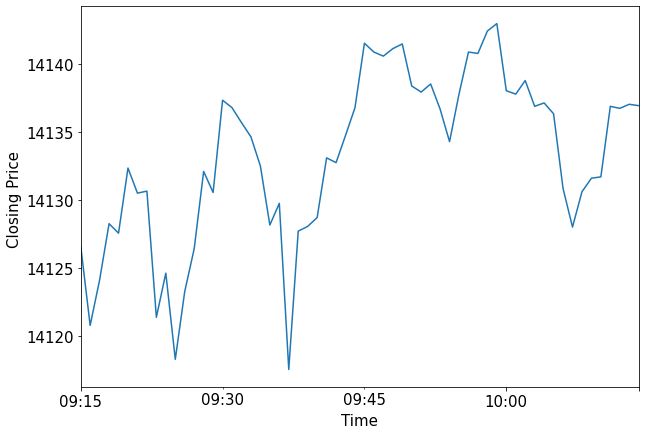

In [41]:
plt.figure(figsize=(10,7))
test_20210101_first.close.plot(fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Closing Price ',fontsize=15)
plt.show()